# Import Packages

In [1]:
import numpy as np 
import pandas as pd 

# Load Dataset and See

In [2]:
df = pd.read_csv("D:\\NYU\Syllabus\Spring 2020\Quant Equity Invest\Project\Original Data\df_liquid.csv")
SPY = pd.read_csv("D:\\NYU\Syllabus\Spring 2020\Quant Equity Invest\Project\Original Data\SPY_Return.csv")

In [3]:
pd.set_option('display.max_columns', None)  # To see all columns
df['Market Cap'] = df['Price'] * df['Shares Outstanding']
df.head(3)

,PERMNO,Date,TICKER,Price,Volume,Return,Shares Outstanding,Turnover,Dollar Turnover,Leverage,Current Ratio,Quick Ratio,Cash Ratio,Market Cap
0,10051,1998-12-01,HGR,22.5000,12744,-0.062500,18179,0.701029,15.773145,0.505724,1.329366,1.329366,0.819465,409027.5000
1,10051,1999-01-01,HGR,25.0000,9577,0.111111,18179,0.526817,13.170416,0.505724,1.329366,1.329366,0.819465,454475.0000
2,10051,1999-02-01,HGR,15.1875,29372,-0.392500,18179,1.615710,24.538602,0.505724,1.329366,1.329366,0.819465,276093.5625


# Test Turnover

## Change Date into datetime type & Set Date as index

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head(3)

,PERMNO,TICKER,Price,Volume,Return,Shares Outstanding,Turnover,Dollar Turnover,Leverage,Current Ratio,Quick Ratio,Cash Ratio,Market Cap
Date,,,,,,,,,,,,,
1998-12-01,10051,HGR,22.5000,12744,-0.062500,18179,0.701029,15.773145,0.505724,1.329366,1.329366,0.819465,409027.5000
1999-01-01,10051,HGR,25.0000,9577,0.111111,18179,0.526817,13.170416,0.505724,1.329366,1.329366,0.819465,454475.0000
1999-02-01,10051,HGR,15.1875,29372,-0.392500,18179,1.615710,24.538602,0.505724,1.329366,1.329366,0.819465,276093.5625


## Construct Date list

In [5]:
Date = []
for i in range(1995, 2016):
    for j in range(1, 13):
        date = str(i) + '-' + str(j)
        Date.append(date)

In [6]:
Date[:5]   # See the first 5 elements

['1995-1', '1995-2', '1995-3', '1995-4', '1995-5']

## Sort by Turnover

In [7]:
Return = []  # Used to store return for each month
for date in Date:
    DF = df[date].copy()  # Divide the big df into small DF by date
    N = int(len(DF)/10)   # We decide to long top 10% of universe and short bottom 10%
    DF = DF.sort_values(by = ['Turnover'], axis = 0, ascending = False)  # Sort by Turnover
    #profit = ( DF.iloc[:N]['Return'].mean() - DF.iloc[-N:]['Return'].mean() ) / 2 
    profit = DF.iloc[:N]['Return'].mean()
    Return.append( profit ) # Store each month's profit

In [8]:
Return[:5]  # See first 5 elements

[0.05795374999999999,
 -0.020701047619047615,
 0.06533047682119206,
 0.03182373509933775,
 0.041260573333333335]

In [9]:
SPY.head(5)

,Date,Return
0,1995-01-01,0.012817
1,1995-02-01,0.024591
2,1995-03-01,0.032419
3,1995-04-01,0.033357
4,1995-05-01,0.024729


In [10]:
Premium = pd.Series(Return) - pd.Series(SPY['Return'].values)

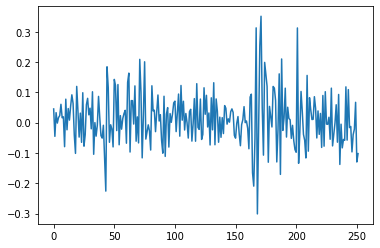

In [11]:
import matplotlib.pyplot as plt
# tmp = Premium + 1.0
# Cumu = Premium.cumprod() - 1.0
plt.plot(Premium)

In [12]:
tmp = Premium + 1 
tmp 

0      1.045137
1      0.954708
2      1.032911
3      0.998466
4      1.016532
         ...   
247    0.960545
248    0.978798
249    1.066985
250    0.870110
251    0.897804
Length: 252, dtype: float64

In [13]:
cumu = tmp.cumprod()
cumu 

0      1.045137
1      0.997800
2      1.030639
3      1.029058
4      1.046071
         ...   
247    8.220036
248    8.045754
249    8.584697
250    7.469627
251    6.706260
Length: 252, dtype: float64

In [14]:
a = cumu - 1 
a 

0      0.045137
1     -0.002200
2      0.030639
3      0.029058
4      0.046071
         ...   
247    7.220036
248    7.045754
249    7.584697
250    6.469627
251    5.706260
Length: 252, dtype: float64

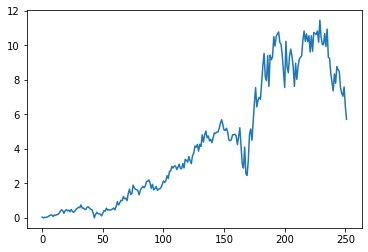

In [15]:
plt.plot(a)

In [16]:
from scipy import stats
stats.ttest_1samp(Premium,0)

Ttest_1sampResult(statistic=2.0510417324197006, pvalue=0.04130110393587057)

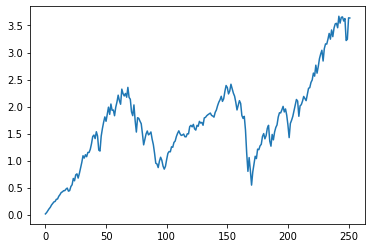

In [17]:
b = SPY['Return'] + 1
b = b.cumprod() - 1
plt.plot(b)

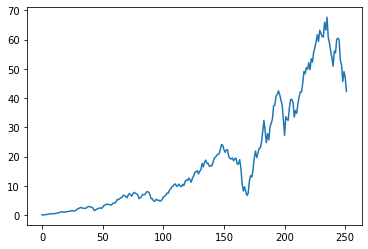

In [18]:
c = pd.Series(Return) + 1
c = c.cumprod() - 1
plt.plot(c)

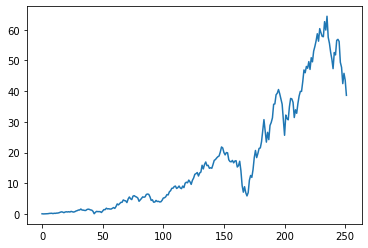

In [19]:
d = c - b 
plt.plot(d)